In [3]:
import pandas as pd
data=pd.read_csv("C:/Users/Admin/Documents/data/salesdatades23.csv")
data['Date']= pd.to_datetime(data['Date'],format='%m/%d/%Y')
print('Shape of Data :', data.shape)
data.head()

Shape of Data : (1353, 6)


,Date,Product,Quantity,Sales,Cost,Profit
0,2024-03-08,Pulsa Indosat 10 K,1,13000,10885,2115
1,2024-03-08,Pulsa Xl 20 K,1,23000,20630,2370
2,2024-03-08,1 Gb Unlimited Indosat,1,38000,33780,4220
3,2024-03-08,1 Gb Indosat (3 Hari),1,9000,6200,2800
4,2024-03-07,Batu Baterai,2,5000,1512,3488


In [4]:
data.describe()

,Quantity,Sales,Cost,Profit
count,1353.000000,1353.000000,1353.000000,1353.000000
mean,1.022912,27551.404287,24074.722099,3476.682188
std,0.224745,25505.857422,25221.443903,2104.962017
min,1.000000,1000.000000,0.000000,-60.000000
25%,1.000000,13000.000000,10800.000000,2543.000000
50%,1.000000,23000.000000,18387.000000,3000.000000
75%,1.000000,33000.000000,28790.000000,3940.000000
max,6.000000,405000.000000,400700.000000,40000.000000


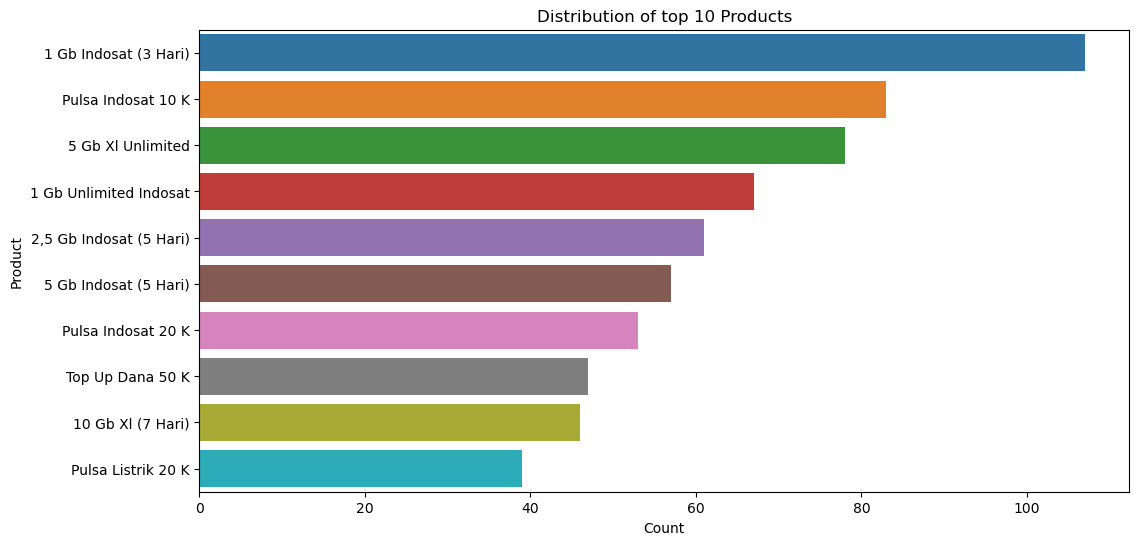

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_products=data['Product'].value_counts().nlargest(10).index
top_10_data=data[data['Product'].isin(top_10_products)]

plt.figure(figsize=(12,6))
sns.countplot(y='Product', data=top_10_data, order=top_10_products)
plt.title("Distribution of top 10 Products")
plt.xlabel('Count')
plt.ylabel("Product")
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder=LabelEncoder()
data['Product_Encoded']=encoder.fit_transform(data['Product'])
data.head()

,Date,Product,Quantity,Sales,Cost,Profit,Product_Encoded
0,2024-03-08,Pulsa Indosat 10 K,1,13000,10885,2115,71
1,2024-03-08,Pulsa Xl 20 K,1,23000,20630,2370,95
2,2024-03-08,1 Gb Unlimited Indosat,1,38000,33780,4220,1
3,2024-03-08,1 Gb Indosat (3 Hari),1,9000,6200,2800,0
4,2024-03-07,Batu Baterai,2,5000,1512,3488,27


In [10]:
#Extract Features
features= data[['Date', 'Quantity', 'Sales', 'Cost', 'Profit']]
labels=data['Product_Encoded']

#Extract Date features
features['day']= data['Date'].dt.day
features['month']=data['Date'].dt.month
features['year']=data['Date'].dt.year
features['dayofweek']=data['Date'].dt.dayofweek

features=features.drop(columns=['Date'])
features.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6700\739929430.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['day']= data['Date'].dt.day


,Quantity,Sales,Cost,Profit,day,month,year,dayofweek
0,1,13000,10885,2115,8,3,2024,4
1,1,23000,20630,2370,8,3,2024,4
2,1,38000,33780,4220,8,3,2024,4
3,1,9000,6200,2800,8,3,2024,4
4,2,5000,1512,3488,7,3,2024,3


In [11]:
scaler=StandardScaler()
features[['Quantity', 'Sales', 'Profit', 'Cost']]= scaler.fit_transform(features[['Quantity', 'Sales', 'Profit', 'Cost']])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(features, labels, test_size=0.2, random_state=42)

In [14]:
model=RandomForestClassifier(n_estimators=200, random_state=42)

model.fit(x_train, y_train)

y_pred= model.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score, classification_report

accuracy=accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
      

accuracy: 0.7896678966789668
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.86      1.00      0.92        12
           4       0.80      1.00      0.89         8
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.87      1.00      0.93        20
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      0.86      0.92         7
          14       0.00      0.00      0.00         0
          16       1.00      1.00      1.00         5
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       1.00      1.00      1.00        11
          21       1.00      0.95      0.98        22
          22       0.75      1.00      0.86         

C:\Users\Admin\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda32\lib\site-packages\s

In [17]:
# Load new data without product names

new_data = pd.read_csv("C:/Users/Admin/Documents/data/SalesPredict.csv")
new_data['Date'] = pd.to_datetime(new_data['Date'], format='%m/%d/%Y')
new_data = new_data[['Date', 'Quantity', 'Sales', 'Profit', 'Cost']]

# Preprocess the new data
new_data['day'] = new_data['Date'].dt.day
new_data['month'] = new_data['Date'].dt.month
new_data['year'] = new_data['Date'].dt.year
new_data['dayofweek'] = new_data['Date'].dt.dayofweek
new_data = new_data.drop(columns=['Date'])
new_data[['Quantity', 'Sales', 'Profit', 'Cost']] = scaler.transform(new_data[['Quantity', 'Sales', 'Profit', 'Cost']])

In [18]:
# Predict the product names for the new data
predictions = model.predict(new_data)

# Decode the product names
predicted_products = label_encoder.inverse_transform(predictions)

# Add the predicted product names to the new data
new_data['predicted_product'] = predicted_products
print(new_data)

datapredict = pd.read_csv(path, sep=",", header=0)
datapredict['predicted_product'] = predicted_products
print(datapredict)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [22]:
new_data = new_data[x_train.columns]  # Align the column order with X_train

# Predict the product names for the new data
predictions = model.predict(new_data)

# Decode the product names
predicted_products = encoder.inverse_transform(predictions)

# Add the predicted product names to the new data
new_data['predicted_product'] = predicted_products

# Print the new data with predictions
print(new_data)



     Quantity     Sales      Cost    Profit  day  month  year  dayofweek  \
0   -0.101985 -0.923714 -0.954887  0.248703    7      3  2024          3   
1   -0.101985 -0.256954 -0.246894 -0.155254    7      3  2024          3   
2   -0.101985 -0.374617 -0.359935 -0.226540    7      3  2024          3   
3   -0.101985  0.017594  0.030750 -0.155254    7      3  2024          3   
4   -0.101985 -0.766829 -0.732613 -0.513587    7      3  2024          3   
..        ...       ...       ...       ...  ...    ...   ...        ...   
360 -0.101985 -0.727608 -0.708973 -0.321589    3      4  2024          2   
361 -0.101985 -0.178511 -0.147735 -0.392875    3      4  2024          2   
362 -0.101985  1.782547  1.835438 -0.392875    3      4  2024          2   
363 -0.101985 -0.374617 -0.346053 -0.392875    3      4  2024          2   
364 -0.101985  0.017594  0.056531 -0.464162    3      4  2024          2   

         predicted_product  
0               Tarik Uang  
1    5 Gb Indosat (5 Hari)  
